# **PARTE 01**

## *1. Importação das Bibliotecas*

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install statsmodels
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
!pip install pmdarima
!pip install statsforecast
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.8/275.8 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 14.8 MB/s eta 0:00:00


## *2. Carregar e Preparar os Dados*

In [ ]:
# Lê o arquivo Parquet contendo os dados históricos.
base = pd.read_parquet("gold.parquet")

# Converte a coluna ‘data’ para o formato correto (datetime).
base['data'] = pd.to_datetime(base['data'])

# Filtra os dados para o período entre 2000 e 2024.
base_filtrada = base[(base['data'] >= '2000-01-01') & (base['data'] <= '2024-12-31')]

# Ordena os dados por data para garantir a sequência correta.
base_filtrada = base_filtrada.sort_values(by="data")

# Preenche valores ausentes com os últimos valores conhecidos (ffill) e os próximos valores (bfill).
base_filtrada.ffill(inplace=True)
base_filtrada.bfill(inplace=True)

# Verifica se ainda existem valores ausentes (obs.: Deveria retornar 0 para todas as colunas)
print(base_filtrada.isnull().sum())

# Exibir como ficou o df final
base_filtrada.head()

data           0
ndx            0
us30           0
ouro           0
ibrx100        0
FTXIN9         0
ibrx50         0
spx            0
bitcoin        0
ibov           0
ibov_futuro    0
prata          0
us500          0
petroleo       0
eur_brl        0
usd_brl        0
cobre          0
vix            0
STOXX50E       0
ethereum       0
ferro          0
dtype: int64


,data,ndx,us30,ouro,ibrx100,FTXIN9,ibrx50,spx,bitcoin,ibov,...,prata,us500,petroleo,eur_brl,usd_brl,cobre,vix,STOXX50E,ethereum,ferro
6186,2000-01-03,3790.550049,11357.500000,283.700012,3210.0,5562.52002,1571.849976,1455.199951,0.1,16930.0,...,5.375,1273.5,24.389999,1.8681,1.819,8620.5,24.209999,2324.47998,11.75,145.0
6187,2000-01-03,3790.550049,11357.500000,283.700012,3210.0,5562.52002,1571.849976,1455.199951,0.1,16930.0,...,5.375,1273.5,24.389999,1.8681,1.819,8620.5,24.209999,2324.47998,11.75,145.0
6188,2000-01-04,3546.199951,10997.900391,283.700012,3031.0,5562.52002,1571.849976,1399.400024,0.1,15851.0,...,5.375,1273.5,24.389999,1.9066,1.848,8620.5,27.010000,2324.47998,11.75,145.0
6189,2000-01-04,3546.199951,10997.900391,283.700012,3031.0,5562.52002,1571.849976,1399.400024,0.1,15851.0,...,5.375,1273.5,24.389999,1.9066,1.848,8620.5,27.010000,2324.47998,11.75,145.0
6190,2000-01-05,3507.310059,11122.700195,282.100006,3084.0,5562.52002,1571.849976,1402.099976,0.1,16245.0,...,5.210,1273.5,23.730000,1.8962,1.837,8620.5,26.410000,2324.47998,11.75,145.0


In [ ]:
# Colocar a coluna de 'data' como índice

base_filtrada.set_index('data', inplace=True)
base_filtrada.head()

,ndx,us30,ouro,ibrx100,FTXIN9,ibrx50,spx,bitcoin,ibov,ibov_futuro,prata,us500,petroleo,eur_brl,usd_brl,cobre,vix,STOXX50E,ethereum,ferro
data,,,,,,,,,,,,,,,,,,,,
2000-01-03,3790.550049,11357.500000,283.700012,3210.0,5562.52002,1571.849976,1455.199951,0.1,16930.0,17489.0,5.375,1273.5,24.389999,1.8681,1.819,8620.5,24.209999,2324.47998,11.75,145.0
2000-01-03,3790.550049,11357.500000,283.700012,3210.0,5562.52002,1571.849976,1455.199951,0.1,16930.0,17489.0,5.375,1273.5,24.389999,1.8681,1.819,8620.5,24.209999,2324.47998,11.75,145.0
2000-01-04,3546.199951,10997.900391,283.700012,3031.0,5562.52002,1571.849976,1399.400024,0.1,15851.0,16373.0,5.375,1273.5,24.389999,1.9066,1.848,8620.5,27.010000,2324.47998,11.75,145.0
2000-01-04,3546.199951,10997.900391,283.700012,3031.0,5562.52002,1571.849976,1399.400024,0.1,15851.0,16373.0,5.375,1273.5,24.389999,1.9066,1.848,8620.5,27.010000,2324.47998,11.75,145.0
2000-01-05,3507.310059,11122.700195,282.100006,3084.0,5562.52002,1571.849976,1402.099976,0.1,16245.0,16694.0,5.210,1273.5,23.730000,1.8962,1.837,8620.5,26.410000,2324.47998,11.75,145.0


In [ ]:
# Verificar se existem linhas duplicadas na base de dados.

print(base_filtrada.duplicated().sum())  # Deve retornar 0 se todas as duplicatas foram removidas
print(base_filtrada.shape)  # Mostra o número de linhas e colunas após a limpeza

3720
(9915, 20)


In [ ]:
# Removendo as linhas duplicadas na base de dados.

base_filtrada = base_filtrada.drop_duplicates()
print(base_filtrada.duplicated().sum())  # Deve retornar 0 se todas as duplicatas foram removidas
print(base_filtrada.shape)  # Mostra o número de linhas e colunas após a limpeza
base_filtrada.head()

0
(6195, 20)


,ndx,us30,ouro,ibrx100,FTXIN9,ibrx50,spx,bitcoin,ibov,ibov_futuro,prata,us500,petroleo,eur_brl,usd_brl,cobre,vix,STOXX50E,ethereum,ferro
data,,,,,,,,,,,,,,,,,,,,
2000-01-03,3790.550049,11357.500000,283.700012,3210.0,5562.52002,1571.849976,1455.199951,0.1,16930.0,17489.0,5.375,1273.5,24.389999,1.8681,1.819,8620.5,24.209999,2324.47998,11.75,145.0
2000-01-04,3546.199951,10997.900391,283.700012,3031.0,5562.52002,1571.849976,1399.400024,0.1,15851.0,16373.0,5.375,1273.5,24.389999,1.9066,1.848,8620.5,27.010000,2324.47998,11.75,145.0
2000-01-05,3507.310059,11122.700195,282.100006,3084.0,5562.52002,1571.849976,1402.099976,0.1,16245.0,16694.0,5.210,1273.5,23.730000,1.8962,1.837,8620.5,26.410000,2324.47998,11.75,145.0
2000-01-06,3340.810059,11253.299805,282.399994,3066.0,5562.52002,1571.849976,1403.500000,0.1,16107.0,16530.0,5.167,1273.5,23.620001,1.9007,1.840,8620.5,25.730000,2324.47998,11.75,145.0
2000-01-07,3529.600098,11522.599609,282.899994,3101.0,5562.52002,1571.849976,1441.500000,0.1,16309.0,16741.0,5.195,1273.5,23.090000,1.8808,1.826,8620.5,21.719999,2324.47998,11.75,145.0


## *3. Análise Exploratória dos Dados (EDA)*

### 3.1 Exibir Informações Gerais da Base

In [ ]:
# Exibir informações gerais sobre os dados (resumo das colunas, seus tipos de dados (int, float, datetime) e quantidade de valores não nulos)
print("Informações Gerais da Base de Dados:")
print(base_filtrada.info())

Informações Gerais da Base de Dados:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6195 entries, 2000-01-03 to 2024-12-30
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ndx          6195 non-null   float32
 1   us30         6195 non-null   float32
 2   ouro         6195 non-null   float32
 3   ibrx100      6195 non-null   float32
 4   FTXIN9       6195 non-null   float32
 5   ibrx50       6195 non-null   float32
 6   spx          6195 non-null   float32
 7   bitcoin      6195 non-null   float32
 8   ibov         6195 non-null   float32
 9   ibov_futuro  6195 non-null   float32
 10  prata        6195 non-null   float32
 11  us500        6195 non-null   float32
 12  petroleo     6195 non-null   float32
 13  eur_brl      6195 non-null   float32
 14  usd_brl      6195 non-null   float32
 15  cobre        6195 non-null   float32
 16  vix          6195 non-null   float32
 17  STOXX50E     6195 non-null   float3

### 3.2 Resumo Estatístico das Variáveis Numéricas

In [ ]:
# Resumo estatístico das variáveis numéricas (média, mediana, desvio padrão, valores mínimos e máximos)
print("\nResumo Estatístico das Variáveis Numéricas:")
print(base_filtrada.describe())


Resumo Estatístico das Variáveis Numéricas:
                ndx          us30         ouro       ibrx100        FTXIN9  \
count   6195.000000   6195.000000  6195.000000   6195.000000   6195.000000   
mean    5268.352539  17973.976562  1137.968018  23471.886719   9689.173828   
std     4987.033691   9371.747070   591.607239  15701.247070   3898.718018   
min      804.640015   6547.000000   256.600006   2536.659912   3510.000000   
25%     1704.340027  10598.750000   572.000000  11707.459961   5562.520020   
50%     2941.409912  13365.900391  1225.699951  20972.830078   9485.799805   
75%     7064.474854  24991.299805  1601.299988  34720.470703  12566.645020   
max    22096.660156  44992.800781  2800.800049  58011.570312  23413.830078   

             ibrx50          spx        bitcoin           ibov   ibov_futuro  \
count   6195.000000  6195.000000    6195.000000    6195.000000   6195.000000   
mean    9611.586914  2113.727783    8090.895996   60854.609375  49504.355469   
std     6017

### 3.3 Verificação de Valores Ausentes

In [ ]:
# Exibe quantos valores ausentes existem em cada coluna.
print("\nValores Ausentes por Coluna:")
print(base_filtrada.isnull().sum())


Valores Ausentes por Coluna:
ndx            0
us30           0
ouro           0
ibrx100        0
FTXIN9         0
ibrx50         0
spx            0
bitcoin        0
ibov           0
ibov_futuro    0
prata          0
us500          0
petroleo       0
eur_brl        0
usd_brl        0
cobre          0
vix            0
STOXX50E       0
ethereum       0
ferro          0
dtype: int64


### 3.4 Verificação de Linhas Duplicadas

In [ ]:
# Conta quantas linhas duplicadas existem na base.
print("\nNúmero de Linhas Duplicadas:", base_filtrada.duplicated().sum())


Número de Linhas Duplicadas: 0


### 3.5 Visualização da Distribuição das Variáveis Numéricas

<Figure size 1200x600 with 0 Axes>

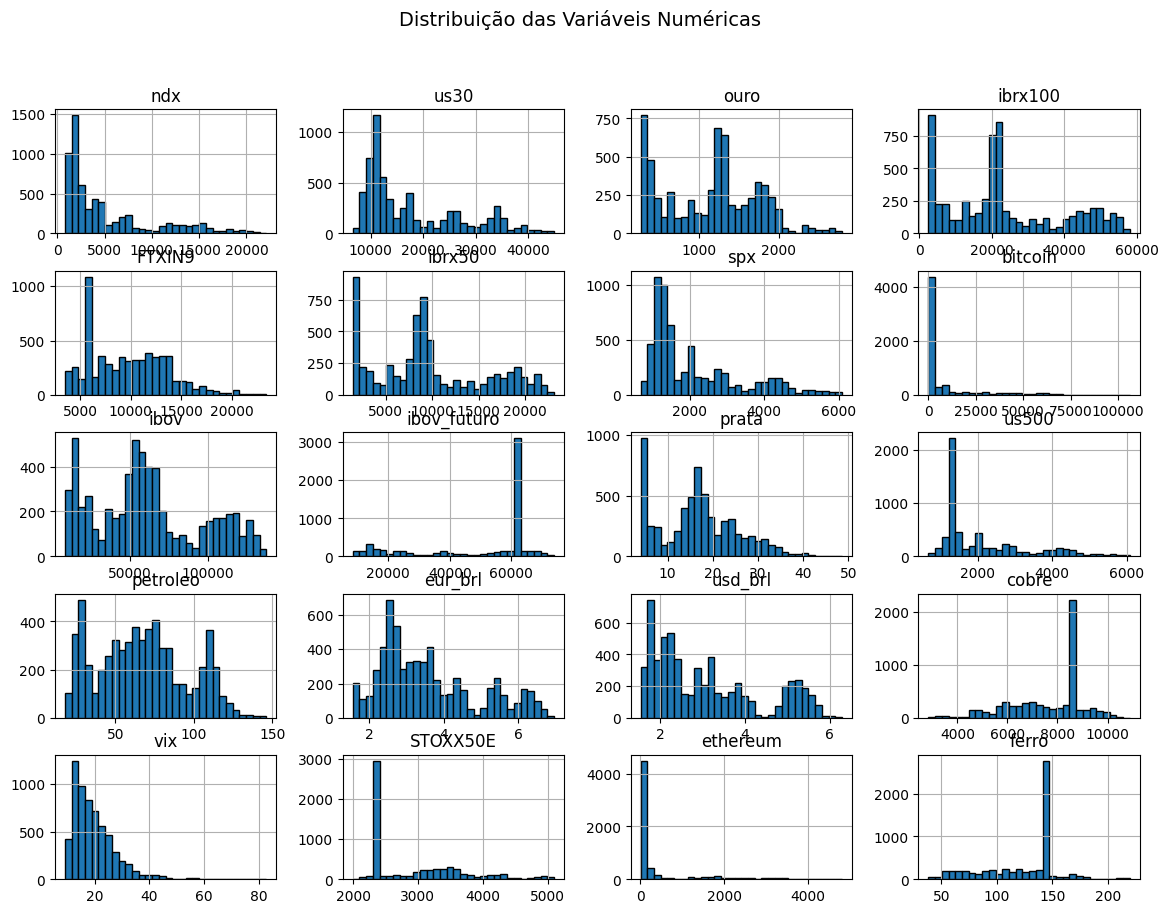

In [ ]:
# Gerar histogramas para cada variável numérica.
plt.figure(figsize=(12, 6))
base_filtrada.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=14)
plt.show()

# Como interpretar os gráficos:
  # Distribuição simétrica? Indica normalidade.
  # Picos inesperados? Possível presença de outliers.

### 3.6 Matriz de Correlação das Variáveis

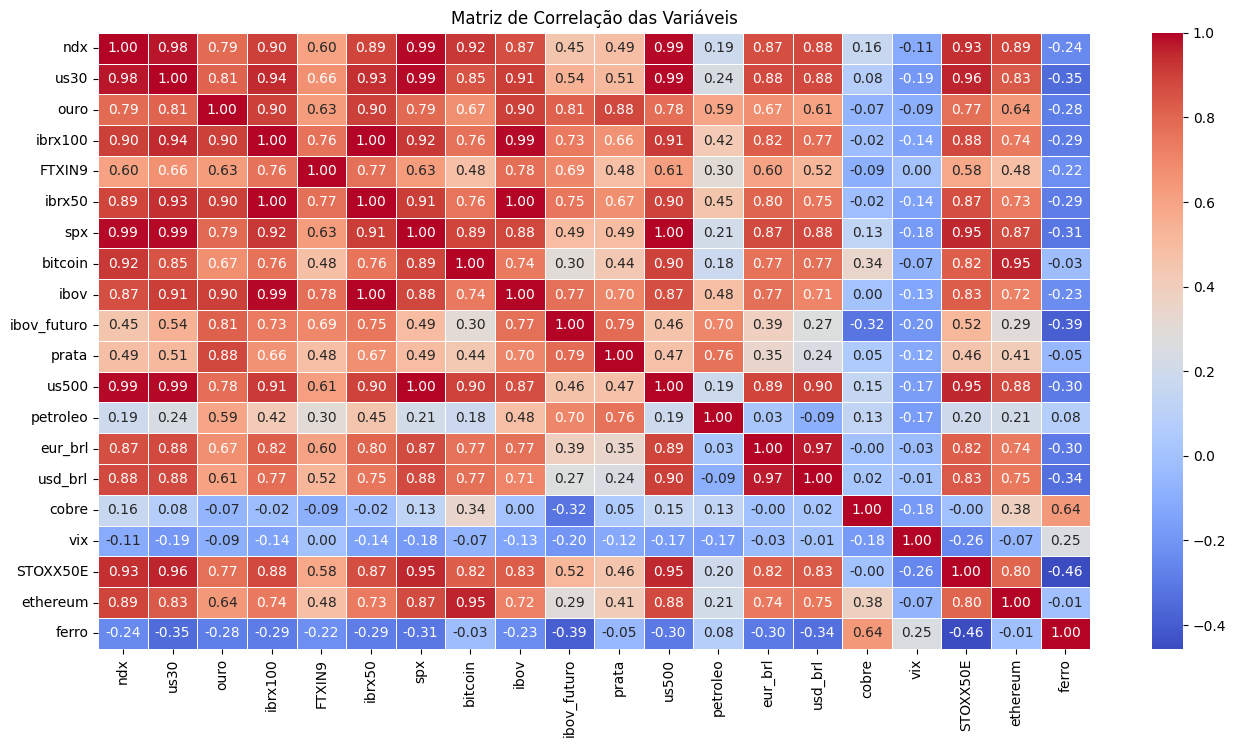

In [ ]:
# Mapa de calor que mostra como as variáveis estão relacionadas.
plt.figure(figsize=(16, 8))
sns.heatmap(base_filtrada.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

  # Correlação próxima de +1 ou -1 → Relação forte entre as variáveis.
  # Correlação próxima de 0 → As variáveis são independentes.

### 3.7 Ordenação das Correlações com o IBOVESPA

In [ ]:
# Calculando a matriz de correlação e ordenando os valores ordem decrescente
correlacao = base_filtrada.corr()
correlacao_ibov = correlacao['ibov']
correlacao_ibov_ordenado = correlacao_ibov.sort_values(ascending=False)
print(correlacao_ibov_ordenado)

ibov           1.000000
ibrx50         0.995336
ibrx100        0.991502
us30           0.906684
ouro           0.902879
spx            0.882764
ndx            0.869101
us500          0.868507
STOXX50E       0.828389
FTXIN9         0.778004
ibov_futuro    0.768650
eur_brl        0.767735
bitcoin        0.742370
ethereum       0.719140
usd_brl        0.706865
prata          0.700614
petroleo       0.480449
cobre          0.000911
vix           -0.133541
ferro         -0.234032
Name: ibov, dtype: float64


### 3.8 Evolução Temporal do IBOVESPA

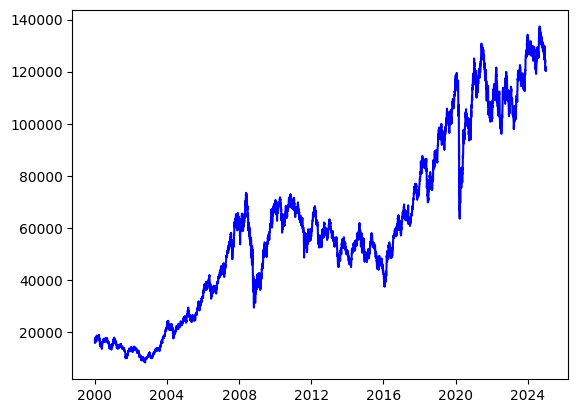

In [ ]:
# Análise temporal do IBOVESPA

plt.plot(base_filtrada.index, base_filtrada['ibov'], color='blue')

### 3.9 Linha de Tendência do IBOVESPA

In [ ]:
# Gráfico de dispersão com uma linha de tendência (OLS - Regressão Linear).

import plotly.express as px

df_plot = base_filtrada.reset_index()  # Reseta o índice para que 'data' vire uma coluna

fig = px.scatter(df_plot, x='data', y='ibov', trendline='ols')
fig.update_traces(line=dict(color="red"))  # Altera a cor da linha de tendência para vermelho
fig.update_layout(title='Dispersão do IBOVESPA com Regressão Linear',
                  xaxis_title='Data',
                  yaxis_title='IBOVESPA')

fig.show()

### 3.10 Distribuição e Densidade do IBOVESPA

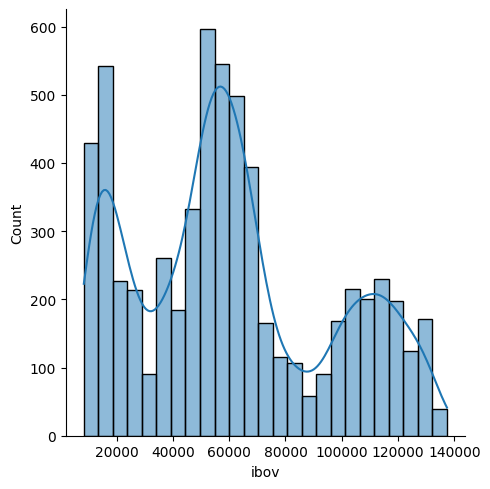

In [ ]:
# Mostrar a distribuição dos valores do IBOVESPA ao longo do tempo
sns.displot(base_filtrada['ibov'], kde=True)
plt.show()

    # Se a curva seguir uma distribuição normal, os dados são bem comportados.
    # Se houver assimetria, pode ser necessário transformar os dados antes da modelagem.

### 3.11 Boxplot para Identificar Outliers

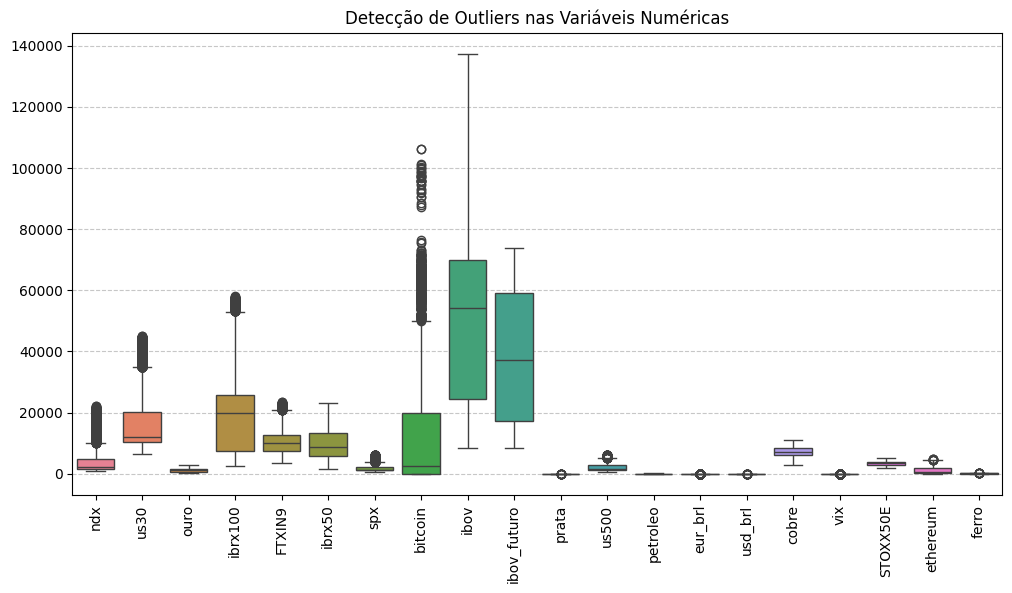

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=base_filtrada)

plt.title("Detecção de Outliers nas Variáveis Numéricas")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade para melhor visualização

plt.show()

## 4. VERIFICAÇÕES

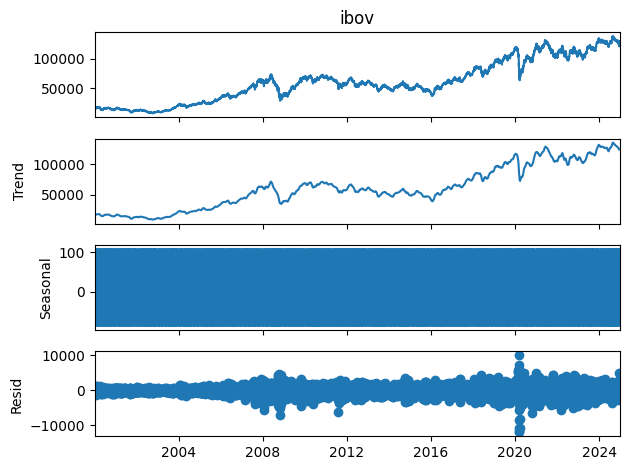

In [ ]:
# Aplicar decomposição (ajuste o período se necessário)
periodo = 21  # 252 dias úteis no ano
resultados = seasonal_decompose(base_filtrada['ibov'], model='additive', period=periodo)

# Plotar resultados
resultados.plot()
plt.show()

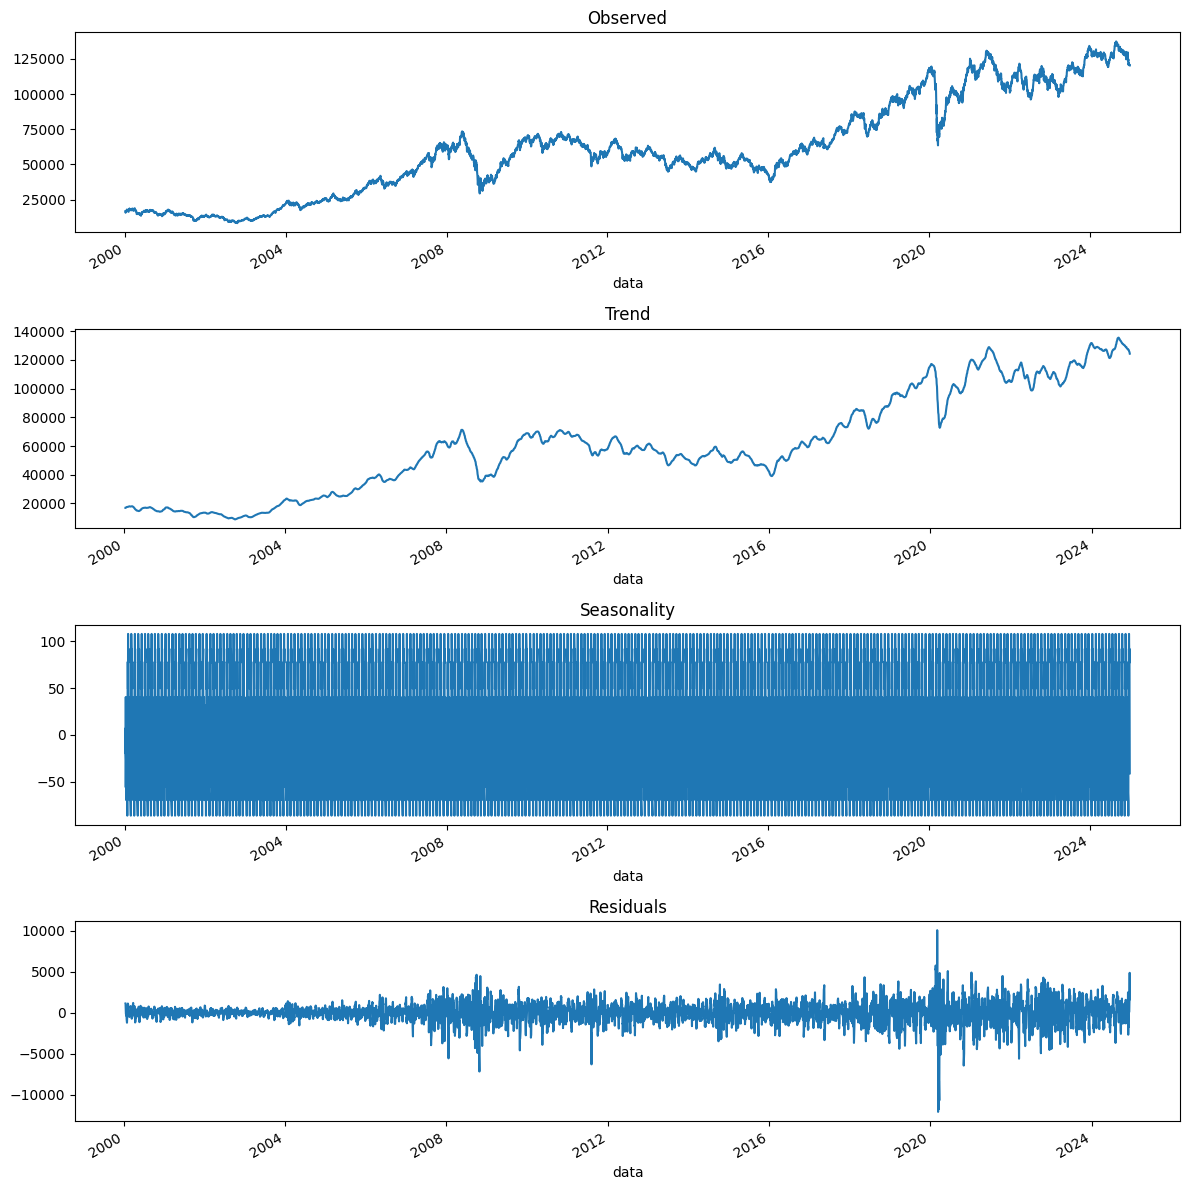

In [ ]:
# Aplicar decomposição (ajuste o período se necessário)
periodo = 21  # 252 dias úteis no ano
resultados = seasonal_decompose(base_filtrada['ibov'], model='additive', period=periodo)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))

resultados.observed.plot(ax=ax1, title="Observed")  # Série original
resultados.trend.plot(ax=ax2, title="Trend")        # Tendência
resultados.seasonal.plot(ax=ax3, title="Seasonality") # Sazonalidade
resultados.resid.plot(ax=ax4, title="Residuals")    # Resíduos (erros)

plt.tight_layout()
plt.show()

### Teste de Estacionariedade (ADF)

In [ ]:
# Teste DF para inspecionar se uma série é estacionária ou não (Teste de Estacionariedade)

p_value = adfuller(base_filtrada['ibov'])
p_value = p_value[1]

if p_value > 0.05:
    print(f"p-value do teste ADF: {p_value}, ou seja, não rejeita H0, a série não é estacionária.")
else:
    print(f"p-value do teste ADF: {p_value}, ou seja, rejeita H0, a série é estacionária.")

p-value do teste ADF: 0.7745104503747332, ou seja, não rejeita H0, a série não é estacionária.


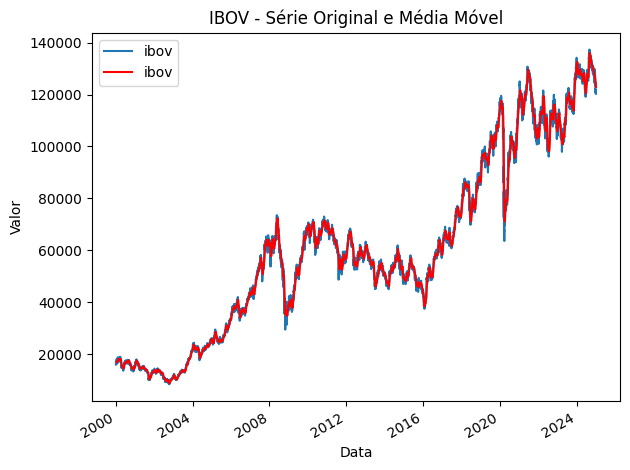

In [ ]:
# Criar média móvel de 12 períodos apenas para 'ibov'
ma_ibov = base_filtrada['ibov'].rolling(12).mean()

# Criar o gráfico
f, ax = plt.subplots()
base_filtrada['ibov'].plot(ax=ax, legend=True)
ma_ibov.plot(ax=ax, legend=True, color='r')

# Melhorando o gráfico
plt.title("IBOV - Série Original e Média Móvel")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.legend()
plt.tight_layout()
plt.show()

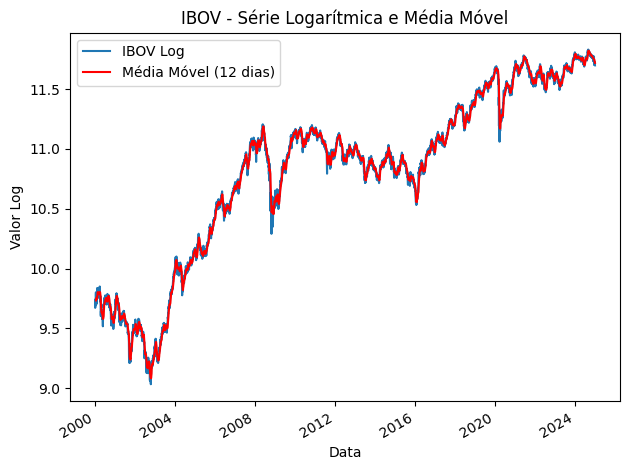

In [ ]:
# Aplicar a transformação logarítmica APENAS na coluna 'ibov'
base_filtrada_log = np.log(base_filtrada['ibov'])

# Calcular a média móvel (período de 12 dias, ajustável)
ma_log = base_filtrada_log.rolling(12).mean()

# Criar o gráfico
f, ax = plt.subplots()
base_filtrada_log.plot(ax=ax, legend=True, label="IBOV Log")  # Plota a série transformada
ma_log.plot(ax=ax, legend=True, color='r', label="Média Móvel (12 dias)")  # Média móvel em vermelho

plt.title("IBOV - Série Logarítmica e Média Móvel")
plt.xlabel("Data")
plt.ylabel("Valor Log")
plt.legend()
plt.tight_layout()
plt.show()

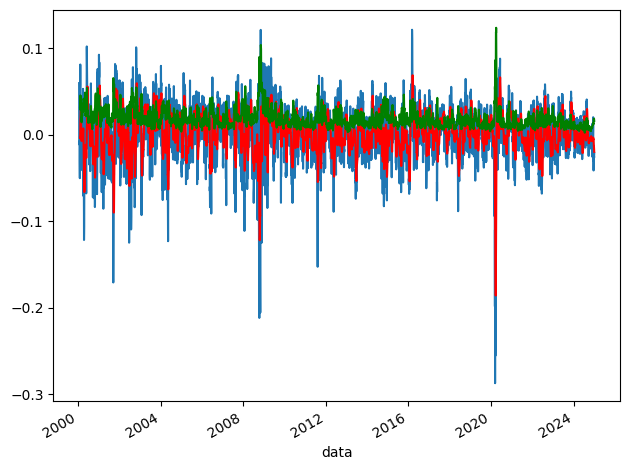

In [ ]:
base_filtrada_s = (base_filtrada_log - ma_log).dropna()

ma_s = base_filtrada_s.rolling(12).mean()

std = base_filtrada_s.rolling(12).std()

f, ax = plt.subplots()
base_filtrada_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [ ]:
x_s = base_filtrada_s.values
result_s = adfuller(x_s)

print("Teste ADF")
print(f"ADF Statistic: {result_s[0]}")
print(f"p-value: {result_s[1]}")
print(f"Critical Values:")
for key, value in result_s[4].items():
    print(f"\t{key}: {value}")

Teste ADF
ADF Statistic: -15.06785210549979
p-value: 8.812251856252612e-28
Critical Values:
	1%: -3.4314111556982785
	5%: -2.862008935577242
	10%: -2.567019611619896


### Transformação para Tornar a Série Estacionária

In [ ]:
# Aplica a diferenciação para remover tendências e faz um novo teste ADF para verificar se a série ficou estacionária.


# Aplicação da difrenciação
base_filtrada['ibov_diff'] = base_filtrada['ibov'].diff()

# Teste ADF após diferenciação
adf_result_diff = adfuller(base_filtrada['ibov_diff'].dropna())  # Remove valores NaN antes do teste

p_value_diff = adf_result_diff[1]

if p_value_diff > 0.05:
    print(f"p-value do teste ADF após diferenciação: {p_value_diff}, ou seja, não rejeita H0, a série não é estacionária.")
else:
    print(f"p-value do teste ADF após diferenciação: {p_value_diff}, ou seja, rejeita H0, a série é estacionária.")

# OBS.: Se após a diferenciação o p-value for menor que 0.05, então a série se tornou adequada para modelagem ARIMA.

p-value do teste ADF após diferenciação: 0.0, ou seja, rejeita H0, a série é estacionária.


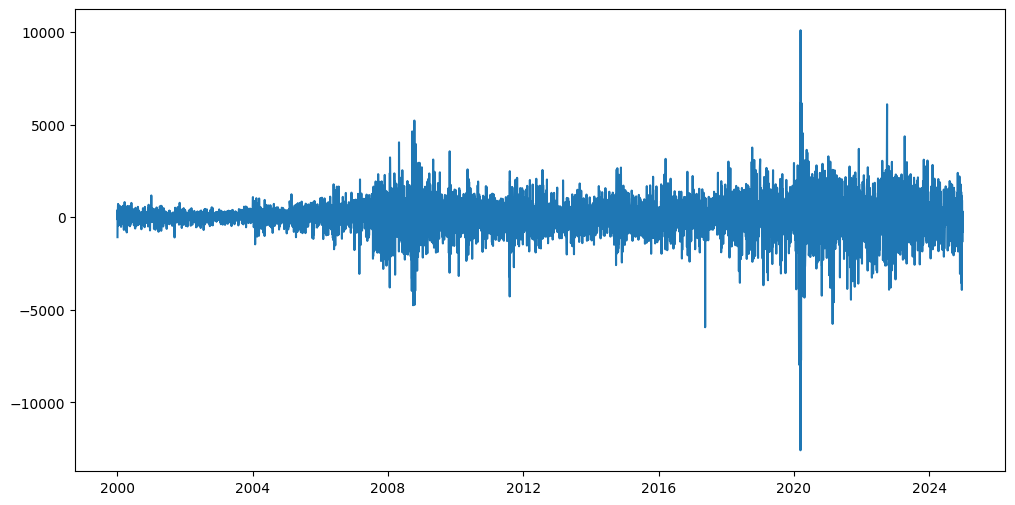

In [ ]:
# Plotando uma série temporal difrenciada

plt.figure(figsize=(12, 6))
plt.plot(base_filtrada['ibov_diff'], label="Dados Históricos")
plt.show()

# **SOCORRO DEUS!**

In [ ]:
base_filtrada_0 = base_filtrada.reset_index()
base_filtrada_1 = base_filtrada_0[['data','ibov']]
base_filtrada_2 = base_filtrada_1.rename(columns={'data':'ds','ibov': 'y'})

print(base_filtrada_2.head())

          ds        y
0 2000-01-03  16930.0
1 2000-01-04  15851.0
2 2000-01-05  16245.0
3 2000-01-06  16107.0
4 2000-01-07  16309.0


In [ ]:
treino = base_filtrada_2.loc[base_filtrada_2['ds'] <= '2024-09-30']
valid = base_filtrada_2.loc[(base_filtrada_2['ds'] >= '2024-10-01')]
h = valid['ds'].nunique()
print(treino.shape)
treino.head()
print(valid.shape)
valid.head()
h

(6134, 2)
(61, 2)


61

Valores ausentes depois do merge:
y        19
Naive     0
dtype: int64
WMAPE: 1.73%


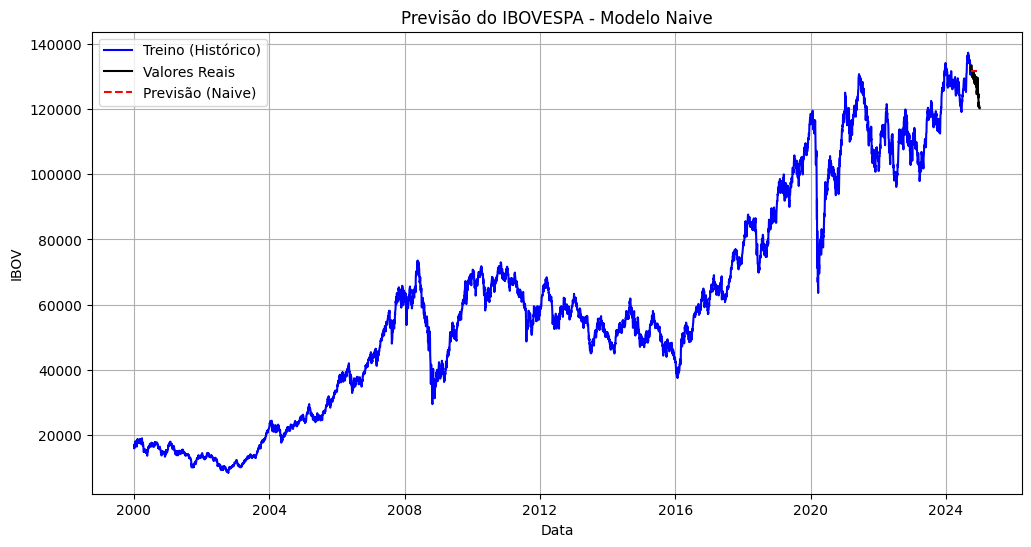

In [ ]:
# Criar a função WMAPE
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)

# Preparação dos dados para o modelo
treino = treino.copy()
treino['unique_id'] = 'IBOV'  # Adiciona um identificador único

# Criação do modelo
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)

# Treinar o modelo (fit)
model.fit(treino[['unique_id', 'ds', 'y']])

# Fazer previsões
h = len(valid)  # Define o horizonte de previsão (mesmo tamanho do conjunto de validação)
forecast_df = model.predict(h=h, level=[90])

# Resetar o índice para evitar problemas no merge
valid = valid.reset_index(drop=True)

# Garantir que as colunas 'ds' estão no formato correto
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])
valid['ds'] = pd.to_datetime(valid['ds'])

# Fazer o merge novamente
forecast_df = forecast_df.merge(valid, on='ds', how='left')

# Verificar valores ausentes
print("Valores ausentes depois do merge:")
print(forecast_df[['y', 'Naive']].isnull().sum())

# Remover valores NaN (caso ainda existam)
forecast_df = forecast_df.dropna(subset=['y', 'Naive'])

# Calcular WMAPE apenas se houver dados válidos
if forecast_df['y'].sum() == 0:
    print("Erro: A soma dos valores reais (y) é zero, não é possível calcular o WMAPE.")
else:
    erro_wmape = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
    print(f'WMAPE: {erro_wmape:.2%}')

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Plotando os valores reais do IBOV
plt.plot(treino['ds'], treino['y'], label="Treino (Histórico)", color="blue")
plt.plot(valid['ds'], valid['y'], label="Valores Reais", color="black")

# Plotando a previsão do modelo Naive
plt.plot(forecast_df['ds'], forecast_df['Naive'], label="Previsão (Naive)", color="red", linestyle="dashed")

# Ajustes do gráfico
plt.xlabel("Data")
plt.ylabel("IBOV")
plt.title("Previsão do IBOVESPA - Modelo Naive")
plt.legend()
plt.grid()

# Exibir o gráfico
plt.show()

Valores ausentes depois do merge:
y                19
SeasonalNaive     0
dtype: int64
WMAPE: 1.59%


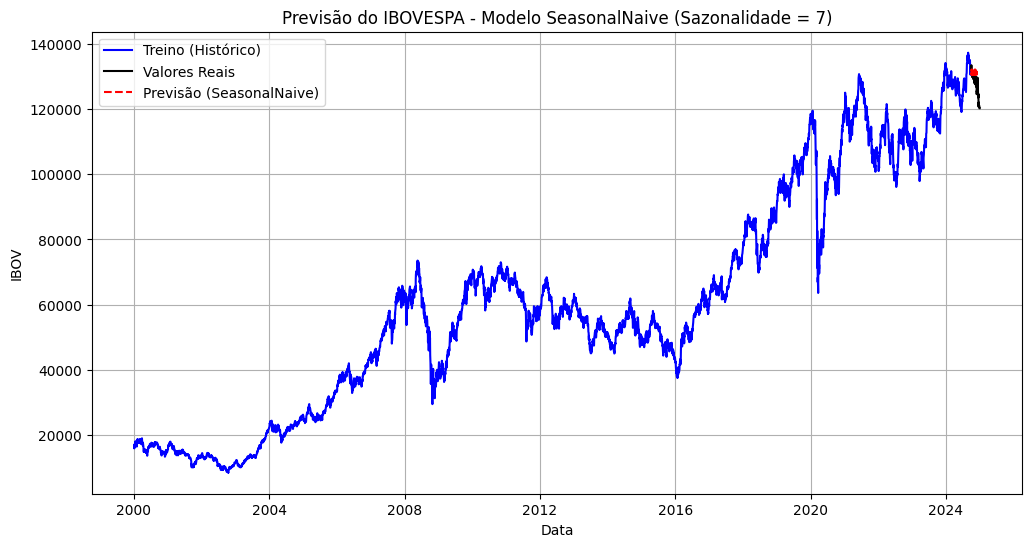

In [ ]:
# Criar a função WMAPE
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)

# Preparação dos dados para o modelo
treino = treino.copy()
treino['unique_id'] = 'IBOV'  # Adiciona um identificador único obrigatório

# Criação do modelo SeasonalNaive com sazonalidade de 7 dias
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)

# Treinar o modelo
model_s.fit(treino[['unique_id', 'ds', 'y']])

# Fazer previsões
h = len(valid)  # Define o horizonte de previsão igual ao conjunto de validação
forecast_df = model_s.predict(h=h, level=[90])

# Resetar o índice do conjunto de validação para evitar problemas no merge
valid = valid.reset_index(drop=True)

# Garantir que as colunas 'ds' estão no formato datetime
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])
valid['ds'] = pd.to_datetime(valid['ds'])

# Fazer o merge novamente
forecast_df = forecast_df.merge(valid, on='ds', how='left')

# Verificar valores ausentes
print("Valores ausentes depois do merge:")
print(forecast_df[['y', 'SeasonalNaive']].isnull().sum())

# Remover valores NaN (caso ainda existam)
forecast_df = forecast_df.dropna(subset=['y', 'SeasonalNaive'])

# Calcular WMAPE apenas se houver dados válidos
if forecast_df['y'].sum() == 0:
    print("Erro: A soma dos valores reais (y) é zero, não é possível calcular o WMAPE.")
else:
    erro_wmape = wmape(forecast_df['y'].values, forecast_df['SeasonalNaive'].values)
    print(f'WMAPE: {erro_wmape:.2%}')

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Plotando os valores reais do IBOV
plt.plot(treino['ds'], treino['y'], label="Treino (Histórico)", color="blue")
plt.plot(valid['ds'], valid['y'], label="Valores Reais", color="black")

# Plotando a previsão do modelo SeasonalNaive
plt.plot(forecast_df['ds'], forecast_df['SeasonalNaive'], label="Previsão (SeasonalNaive)", color="red", linestyle="dashed")

# Ajustes do gráfico
plt.xlabel("Data")
plt.ylabel("IBOV")
plt.title("Previsão do IBOVESPA - Modelo SeasonalNaive (Sazonalidade = 7)")
plt.legend()
plt.grid()

# Exibir o gráfico
plt.show()

Valores ausentes depois do merge:
y                21
SeasonalNaive     0
dtype: int64
WMAPE: 2.50%


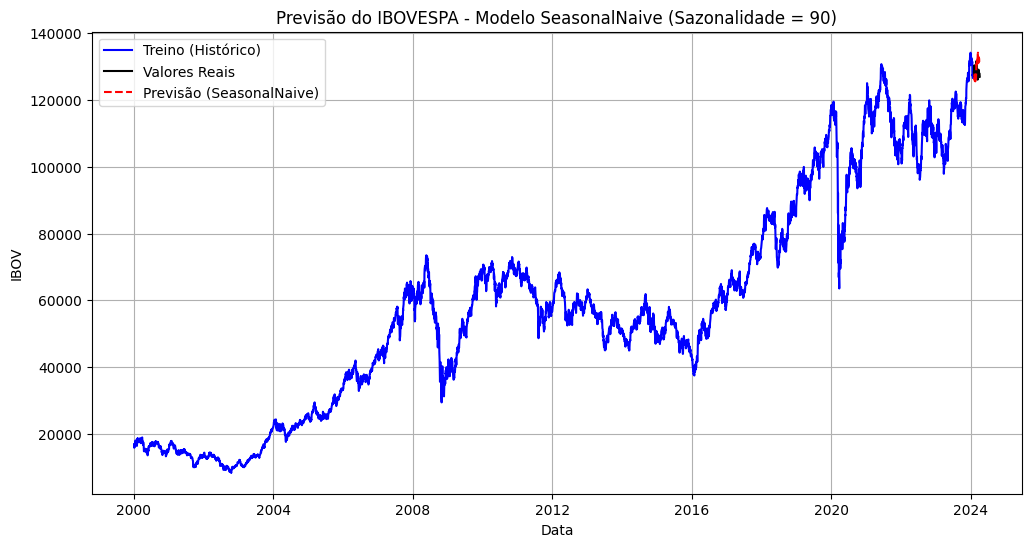

In [ ]:
# Criar a função WMAPE
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)

# Preparação dos dados para o modelo (usando todas as datas disponíveis)
base_filtrada = base[(base['data'] >= '2000-01-01') & (base['data'] <= '2024-12-31')]

# Ajustando as colunas
base_filtrada_0 = base_filtrada.reset_index()
base_filtrada_1 = base_filtrada_0[['data', 'ibov']]
base_filtrada_2 = base_filtrada_1.rename(columns={'data': 'ds', 'ibov': 'y'})

# Criando treino e horizonte de previsão
treino = base_filtrada_2.loc[base_filtrada_2['ds'] <= '2024-01-31']  # Treino até 31/01/2024
h = 60  # Previsão para os próximos 60 dias

# Criando o modelo SeasonalNaive com sazonalidade trimestral (90 dias)
model_s = StatsForecast(models=[SeasonalNaive(season_length=90)], freq='D', n_jobs=-1)

# Adicionando identificador único obrigatório
treino = treino.copy()
treino['unique_id'] = 'IBOV'

# Treinar o modelo
model_s.fit(treino[['unique_id', 'ds', 'y']])

# Fazer previsões para os próximos 60 dias
forecast_df = model_s.predict(h=h, level=[90])

# Criar datas para o período de previsão
forecast_df['ds'] = pd.date_range(start='2024-02-01', periods=h, freq='D')

# Garantir que 'ds' está no formato correto
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])

# Criando conjunto `valid` com as datas reais para comparação
valid = base_filtrada_2.loc[(base_filtrada_2['ds'] >= '2024-02-01') & (base_filtrada_2['ds'] <= '2024-04-01')]

# Resetar o índice do conjunto de validação para evitar problemas no merge
valid = valid.reset_index(drop=True)

# Fazer o merge para comparar previsões com valores reais
forecast_df = forecast_df.merge(valid, on='ds', how='left')

# Verificar valores ausentes
print("Valores ausentes depois do merge:")
print(forecast_df[['y', 'SeasonalNaive']].isnull().sum())

# Remover valores NaN (caso ainda existam)
forecast_df = forecast_df.dropna(subset=['y', 'SeasonalNaive'])

# Calcular WMAPE apenas se houver dados válidos
if forecast_df['y'].sum() == 0:
    print("Erro: A soma dos valores reais (y) é zero, não é possível calcular o WMAPE.")
else:
    erro_wmape = wmape(forecast_df['y'].values, forecast_df['SeasonalNaive'].values)
    print(f'WMAPE: {erro_wmape:.2%}')

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Plotando os valores reais do IBOV
plt.plot(treino['ds'], treino['y'], label="Treino (Histórico)", color="blue")
plt.plot(valid['ds'], valid['y'], label="Valores Reais", color="black")

# Plotando a previsão do modelo SeasonalNaive
plt.plot(forecast_df['ds'], forecast_df['SeasonalNaive'], label="Previsão (SeasonalNaive)", color="red", linestyle="dashed")

# Ajustes do gráfico
plt.xlabel("Data")
plt.ylabel("IBOV")
plt.title("Previsão do IBOVESPA - Modelo SeasonalNaive (Sazonalidade = 90)")
plt.legend()
plt.grid()

# Exibir o gráfico
plt.show()

# **PARTE 02**

## ARIMA (TEST)

### Modelagem ARIMA (c/ Auto ARIMA)

In [ ]:
# Auto ARIMA encontra os melhores parâmetros automaticamente (p, d, q) | O modelo é ajustado automaticamente, economizando tempo na escolha dos hiperparâmetros.

from pmdarima import auto_arima

# Definir a coluna 'data' como índice
if 'data' in base_filtrada.columns:
    base_filtrada.set_index('data', inplace=True)

# Aplicar o Auto ARIMA
auto_model = auto_arima(base_filtrada['ibov'],
          start_p=0, start_q=0,
          max_p=10, max_q=10,
          seasonal=False,  #Ajustar para True se houver sazonalidade
          trace=True,
          error_action='ignore',
          suppress_warnings=True,
          stepwise=True)

# Exibir sumário do modelo
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=160760.670, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=160721.542, Time=1.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=160723.865, Time=3.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=160760.340, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=160716.163, Time=3.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=160716.380, Time=3.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=160717.600, Time=11.82 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=160719.280, Time=1.63 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=160691.910, Time=9.23 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=160688.742, Time=11.78 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=160710.991, Time=1.92 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=160689.275, Time=13.32 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=160683.586, Time=24.01 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=160718.686, Time=6.49 sec
 

### Previsões para os próximos 30 dias

In [ ]:
# Gera previsões para os próximos 30 dias úteis e cria um df para armazenar as previsões.

n_periods = 30
previsoes = auto_model.predict(n_periods=n_periods)

# Criar datas para previsão (dias úteis)
ultimo_indice = base_filtrada.index[-1]
datas_previsao = pd.date_range(start=ultimo_indice, periods=n_periods + 1, freq='B')[1:]

# Criar df com as previsões
df_previsao = pd.DataFrame({'Data': datas_previsao, 'Previsao': previsoes}).set_index('Data')

# Exibir o df com as previsões
from IPython.display import display
display(df_previsao)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



,Previsao
Data,
2024-12-31,120192.267845
2025-01-01,120210.499668
2025-01-02,120244.586786
2025-01-03,120179.520206
2025-01-06,120256.493380
2025-01-07,120182.397080
2025-01-08,120243.894005
2025-01-09,120199.854881
2025-01-10,120225.609252


### Visualização da Previsão

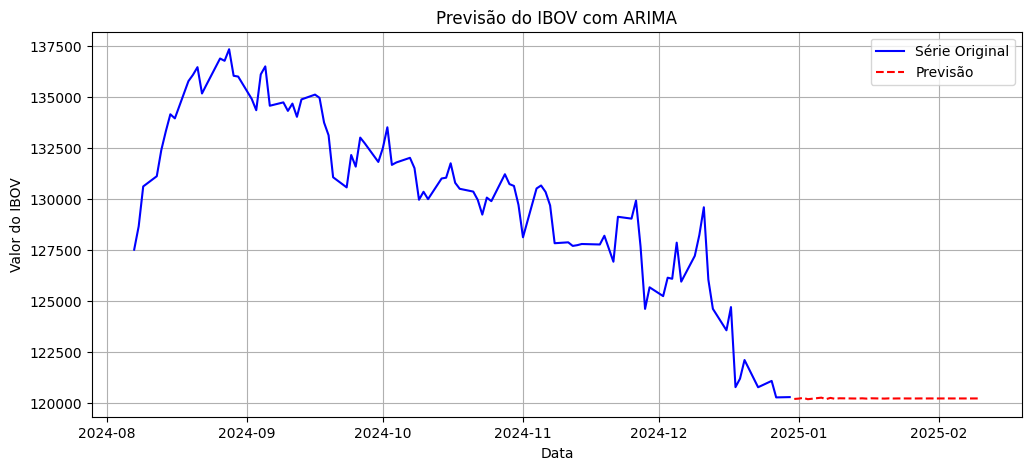

In [ ]:
# Visualizar previsão
plt.figure(figsize=(12,5))

# Plot da série original (últimos 100 dias)
plt.plot(base_filtrada.index[-100:], base_filtrada['ibov'][-100:], label='Série Original', color='blue')

# Plot da previsão dos próximos dias.
plt.plot(df_previsao.index, df_previsao['Previsao'], label='Previsão', linestyle='dashed', color='red')

plt.legend()
plt.title("Previsão do IBOV com ARIMA")
plt.xlabel("Data")
plt.ylabel("Valor do IBOV")
plt.grid()
plt.show()

### Avaliação da Precisão do Modelo

#### Separar os Dados de Treino e Teste

In [ ]:
# Definir proporção para treino e teste (exemplo: 80% treino, 20% teste)
train_size = int(len(base_filtrada) * 0.8)
train, test = base_filtrada.iloc[:train_size], base_filtrada.iloc[train_size:]

# Exibir tamanho das bases
print(f"Tamanho da base de treino: {len(train)}")
print(f"Tamanho da base de teste: {len(test)}")

Tamanho da base de treino: 7932
Tamanho da base de teste: 1983
